In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
folder_path = r'C:\Users\arthur.oliveira\OneDrive\Study\Python-Data-Science\Data Analysis\Databases\Games\Video_Games.csv'
df = pd.read_csv(folder_path)

In [14]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

In [ ]:
# Noticed that this column had non numeric values, so I had to adjust to convert column type 
df['User_Score'].value_counts()

In [51]:
df['User_Score'].replace('tbd',np.nan, inplace=True)

In [52]:
df['User_Score'].value_counts()

User_Score
7.8    322
8      285
8.2    276
8.3    252
7.5    249
      ... 
1.5      2
0.3      2
1.1      2
0        1
9.7      1
Name: count, Length: 95, dtype: int64

In [53]:
df['User_Score'] = df['User_Score'].astype(float)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16448 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16448 non-null  object 
 1   Platform         16448 non-null  object 
 2   Year_of_Release  16448 non-null  float64
 3   Genre            16448 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16448 non-null  float64
 6   EU_Sales         16448 non-null  float64
 7   JP_Sales         16448 non-null  float64
 8   Other_Sales      16448 non-null  float64
 9   Global_Sales     16448 non-null  float64
 10  Critic_Score     7983 non-null   float64
 11  Critic_Count     7983 non-null   float64
 12  User_Score       7463 non-null   float64
 13  User_Count       7463 non-null   float64
 14  Developer        9907 non-null   object 
 15  Rating           9769 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.6+ MB


In [4]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [56]:
df['Rating'].value_counts()

Rating
E       3922
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: count, dtype: int64

In [55]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16448.000000,16448.000000,16448.000000,16448.000000,16448.000000,16448.00000,7983.000000,7983.000000,7463.000000,7463.000000
mean,2006.488996,0.263965,0.145895,0.078472,0.047583,0.53617,68.994363,26.441313,7.126330,163.015141
std,5.877470,0.818286,0.506660,0.311064,0.187984,1.55846,13.920060,19.008136,1.499447,563.863327
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.01000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.06000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.17000,71.000000,22.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.47000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.53000,98.000000,113.000000,9.700000,10665.000000


In [57]:
# Counting null values
df.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher            32
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8465
Critic_Count       8465
User_Score         8985
User_Count         8985
Developer          6541
Rating             6679
dtype: int64

In [58]:
df = df.dropna(subset=['Name', 'Year_of_Release'])
# df.dropna(subset=['Name', 'Year_of_Release'], inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16448 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16448 non-null  object 
 1   Platform         16448 non-null  object 
 2   Year_of_Release  16448 non-null  float64
 3   Genre            16448 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16448 non-null  float64
 6   EU_Sales         16448 non-null  float64
 7   JP_Sales         16448 non-null  float64
 8   Other_Sales      16448 non-null  float64
 9   Global_Sales     16448 non-null  float64
 10  Critic_Score     7983 non-null   float64
 11  Critic_Count     7983 non-null   float64
 12  User_Score       7463 non-null   float64
 13  User_Count       7463 non-null   float64
 14  Developer        9907 non-null   object 
 15  Rating           9769 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.6+ MB


In [60]:
# Counting null values
df.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher            32
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8465
Critic_Count       8465
User_Score         8985
User_Count         8985
Developer          6541
Rating             6679
dtype: int64

In [63]:
# See if there are non unique titles
df['Name'].value_counts()

Name
Need for Speed: Most Wanted               12
FIFA 14                                    9
LEGO Marvel Super Heroes                   9
Ratatouille                                9
Madden NFL 08                              8
                                          ..
Loving Life with Hello Kitty & Friends     1
Scrabble (Others sales)                    1
Viva Pinata: Party Animals                 1
Sands of Destruction                       1
Haitaka no Psychedelica                    1
Name: count, Length: 11429, dtype: int64

In [64]:
# Some games are available in multi platforms so it counts more than one in table 
df[df['Name']=='FIFA 14']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
126,FIFA 14,PS3,2013.0,Sports,Electronic Arts,0.78,4.24,0.07,1.37,6.47,86.0,37.0,4.3,576.0,EA Canada,E
271,FIFA 14,X360,2013.0,Sports,Electronic Arts,0.92,2.89,0.01,0.40,4.22,84.0,41.0,4.2,435.0,EA Canada,E
469,FIFA 14,PS4,2013.0,Sports,Electronic Arts,0.61,1.85,0.11,0.44,3.01,87.0,26.0,6.3,616.0,EA Canada,E
1753,FIFA 14,XOne,2013.0,Sports,Electronic Arts,0.41,0.66,0.00,0.09,1.16,88.0,22.0,5.8,328.0,EA Canada,E
4699,FIFA 14,PSV,2013.0,Sports,Electronic Arts,0.08,0.23,0.01,0.09,0.41,NaN,NaN,1.8,69.0,EA Canada,E
4809,FIFA 14,PC,2013.0,Sports,Electronic Arts,0.01,0.36,0.00,0.03,0.40,87.0,6.0,4.6,441.0,EA Canada,E
4985,FIFA 14,Wii,2013.0,Sports,Electronic Arts,0.00,0.36,0.00,0.02,0.38,NaN,NaN,4.3,19.0,EA Canada,E
6872,FIFA 14,3DS,2013.0,Sports,Electronic Arts,0.00,0.22,0.00,0.01,0.24,NaN,NaN,NaN,NaN,NaN,NaN
7876,FIFA 14,PSP,2013.0,Sports,Electronic Arts,0.00,0.15,0.00,0.04,0.19,NaN,NaN,3.4,23.0,EA Canada,E


In [65]:
df_xbox360 = df[df['Platform'] == 'X360']

In [72]:
df_xbox360

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.04,4.24,0.13,1.32,14.73,88.0,81.0,3.4,8713.0,"Infinity Ward, Sledgehammer Games",M
32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,1.13,14.61,87.0,89.0,6.3,1454.0,Treyarch,M
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.24,0.07,1.12,13.67,83.0,73.0,4.8,2256.0,Treyarch,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16617,Dragon Ball Z for Kinect,X360,2012.0,Fighting,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01,49.0,32.0,2.1,39.0,Spike,T
16626,World Snooker Championship 2007,X360,2007.0,Sports,Sega,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16651,Metal Gear Solid HD Edition,X360,2011.0,Action,Konami Digital Entertainment,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,Konami,M
16658,Ben 10 Omniverse 2,X360,2013.0,Action,Namco Bandai Games,0.00,0.01,0.00,0.00,0.01,NaN,NaN,5.1,9.0,High Voltage Software,E10+


In [73]:
df_xbox360['Name'].value_counts()

Name
Need for Speed: Most Wanted                                    2
Kinect Adventures!                                             1
World Series of Poker: Tournament of Champions 2007 Edition    1
Sherlock Holmes vs. Jack the Ripper                            1
Amped 3                                                        1
                                                              ..
Dragon Age: Inquisition                                        1
LEGO Dimensions                                                1
NHL 14                                                         1
Two Worlds II                                                  1
LMA Manager 2007                                               1
Name: count, Length: 1231, dtype: int64

In [74]:
df_xbox360.loc[df['Name'] == 'Need for Speed: Most Wanted']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.78,0.01,0.15,1.56,83.0,54.0,8.5,134.0,EA Canada,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.13,0.02,0.10,1.25,83.0,54.0,8.5,134.0,EA Canada,T


In [75]:
df_xbox360.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1232 entries, 14 to 16715
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1232 non-null   object 
 1   Platform         1232 non-null   object 
 2   Year_of_Release  1232 non-null   float64
 3   Genre            1232 non-null   object 
 4   Publisher        1232 non-null   object 
 5   NA_Sales         1232 non-null   float64
 6   EU_Sales         1232 non-null   float64
 7   JP_Sales         1232 non-null   float64
 8   Other_Sales      1232 non-null   float64
 9   Global_Sales     1232 non-null   float64
 10  Critic_Score     894 non-null    float64
 11  Critic_Count     894 non-null    float64
 12  User_Score       945 non-null    float64
 13  User_Count       945 non-null    float64
 14  Developer        1035 non-null   object 
 15  Rating           1030 non-null   object 
dtypes: float64(10), object(6)
memory usage: 163.6+ KB


In [76]:
# VER VALORES UNICOS 
valores_unicos = df['Genre'].unique()

print(valores_unicos)


['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [77]:
# VER VALORES UNICOS 
valores_unicos2 = df['Platform'].unique()

print(valores_unicos2)


['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


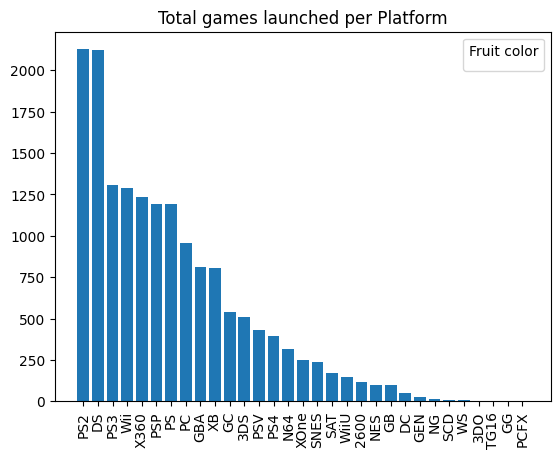

In [71]:
fig, ax = plt.subplots()
contagem = df['Platform'].value_counts()
ax.bar(contagem.index, contagem.values)

# ax.set_ylabel('fruit supply')
ax.set_title('Total games launched per Platform')
ax.legend(title='Fruit color')
plt.xticks(rotation=90)
plt.show()

In [78]:
df2= df.query('2000 <= Year_of_Release <= 2015')
df2  = df2.head(100)

In [79]:
# agrupei por Ano para poder mostrar no grafico o eixo x de 3 em 3 anos
df2_group_year = df2.groupby(['Year_of_Release']).sum()

In [99]:
df2_group_year.head()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Year_of_Release,,,,,,,,,,,,,,,
2001.0,Gran Turismo 3: A-SpecGrand Theft Auto IIIFina...,PS2PS2PS2GCXB,RacingActionRole-PlayingFightingShooter,Sony Computer EntertainmentTake-Two Interactiv...,26.14,14.01,6.37,3.08,49.63,473.0,269.0,43.3,3885.0,Polyphony DigitalDMA DesignSquareSoftHAL LabsB...,EMTTM
2002.0,Grand Theft Auto: Vice CityPokemon Ruby/Pokemo...,PS2GBAPS2,ActionRole-PlayingShooter,Take-Two InteractiveNintendoElectronic Arts,17.40,12.14,6.02,3.27,38.83,183.0,91.0,17.2,865.0,Rockstar NorthEA LA,MT
2003.0,Need for Speed UndergroundMario Kart: Double D...,PS2GC,RacingRacing,Electronic ArtsNintendo,7.39,4.60,0.95,1.21,14.15,85.0,33.0,8.6,171.0,EA Black Box,E
2004.0,Grand Theft Auto: San AndreasGran Turismo 4Pok...,PS2PS2GBADSXBPS2,ActionRacingRole-PlayingPlatformShooterRacing,Take-Two InteractiveSony Computer Entertainmen...,31.32,10.68,6.04,20.59,68.65,361.0,284.0,34.3,3210.0,Rockstar NorthPolyphony DigitalBungie Software...,MEME
2005.0,NintendogsMario Kart DSBrain Age: Train Your B...,DSDSDSDSDSPSPDS,SimulationRacingMiscPuzzleSimulationActionMisc,NintendoNintendoNintendoNintendoNintendoTake-T...,33.99,41.98,22.71,11.07,109.76,493.0,326.0,47.3,1253.0,NintendoNintendoNintendoNintendoRockstar Leeds...,EEEEME


In [101]:
df2_group_year.shape

(15, 15)

In [82]:
df2.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [84]:
region = ['NA_Sales','Global_Sales','JP_Sales','EU_Sales']

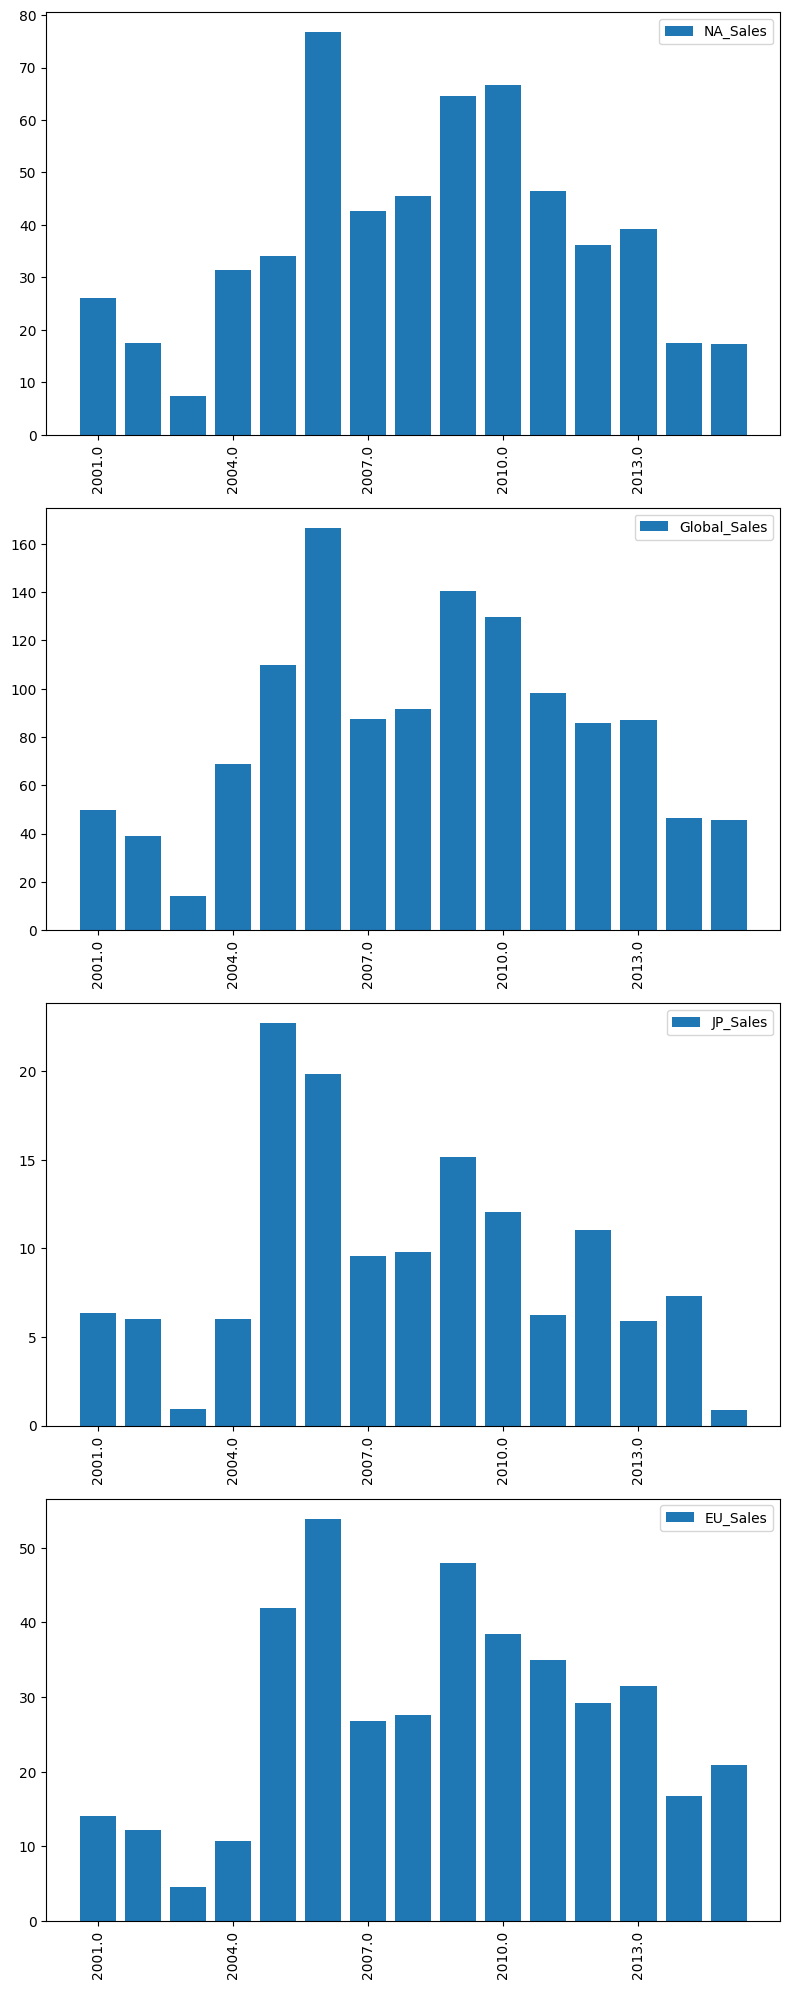

In [91]:
fig, axs = plt.subplots(len(region), figsize=(8, 5*len(region)))

for i, reg in enumerate(region):
    #plota grafico
    axs[i].bar(df2_group_year.index, df2_group_year[reg], label=reg)

    #altera eixo x
    axs[i].set_xticks(df2_group_year.index[::3])
    axs[i].set_xticklabels(df2_group_year.index[::3], rotation=90)

    #adiciona legenda
    axs[i].legend([reg])

plt.tight_layout()
plt.show()

In [ ]:
#plota como figura, adiciona dimensoes para a plotagem
plt.figure(figsize=(8,5))

#plota grafico
plt.bar(df2_group_year.index, df2_group_year.NA_Sales, label='NA sales')
plt.bar(df2_group_year.index, df2_group_year.EU_Sales, label='EU sales')

#altera eixo x
plt.xticks(df2_group_year.index[::3],rotation=90)

# Adiciona titulo aos eixos
plt.xlabel('Year')
plt.ylabel('US Dollars')

#adiciona legenda
plt.legend()


In [94]:
df2_group_year.index[::3]

Index([2001.0, 2004.0, 2007.0, 2010.0, 2013.0], dtype='float64', name='Year_of_Release')

In [95]:
df2_group_year.index

Index([2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0,
       2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0],
      dtype='float64', name='Year_of_Release')

In [96]:
df2_group_year

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Year_of_Release,,,,,,,,,,,,,,,
2001.0,Gran Turismo 3: A-SpecGrand Theft Auto IIIFina...,PS2PS2PS2GCXB,RacingActionRole-PlayingFightingShooter,Sony Computer EntertainmentTake-Two Interactiv...,26.14,14.01,6.37,3.08,49.63,473.0,269.0,43.3,3885.0,Polyphony DigitalDMA DesignSquareSoftHAL LabsB...,EMTTM
2002.0,Grand Theft Auto: Vice CityPokemon Ruby/Pokemo...,PS2GBAPS2,ActionRole-PlayingShooter,Take-Two InteractiveNintendoElectronic Arts,17.40,12.14,6.02,3.27,38.83,183.0,91.0,17.2,865.0,Rockstar NorthEA LA,MT
2003.0,Need for Speed UndergroundMario Kart: Double D...,PS2GC,RacingRacing,Electronic ArtsNintendo,7.39,4.60,0.95,1.21,14.15,85.0,33.0,8.6,171.0,EA Black Box,E
2004.0,Grand Theft Auto: San AndreasGran Turismo 4Pok...,PS2PS2GBADSXBPS2,ActionRacingRole-PlayingPlatformShooterRacing,Take-Two InteractiveSony Computer Entertainmen...,31.32,10.68,6.04,20.59,68.65,361.0,284.0,34.3,3210.0,Rockstar NorthPolyphony DigitalBungie Software...,MEME
2005.0,NintendogsMario Kart DSBrain Age: Train Your B...,DSDSDSDSDSPSPDS,SimulationRacingMiscPuzzleSimulationActionMisc,NintendoNintendoNintendoNintendoNintendoTake-T...,33.99,41.98,22.71,11.07,109.76,493.0,326.0,47.3,1253.0,NintendoNintendoNintendoNintendoRockstar Leeds...,EEEEME
2006.0,Wii SportsNew Super Mario Bros.Wii PlayPokemon...,WiiDSWiiDSWii,SportsPlatformMiscRole-PlayingAction,NintendoNintendoNintendoNintendoNintendo,76.72,53.88,19.84,16.21,166.65,318.0,230.0,32.1,2540.0,NintendoNintendoNintendoNintendo,EEET
2007.0,Wii FitHalo 3Super Mario GalaxyCall of Duty 4:...,WiiX360WiiX360DSWiiWiiPS3,SportsShooterPlatformShooterMiscMiscSportsShooter,NintendoMicrosoft Game StudiosNintendoActivisi...,42.70,26.76,9.56,8.32,87.33,593.0,404.0,55.3,8981.0,"NintendoBungie Software, BungieNintendoInfinit...",EMEMEEM
2008.0,Mario Kart WiiSuper Smash Bros. BrawlGrand The...,WiiWiiX360PS3DSX360X360,RacingFightingActionActionRole-PlayingShooterS...,NintendoNintendoTake-Two InteractiveTake-Two I...,45.54,27.57,9.78,8.81,91.72,631.0,524.0,56.4,11677.0,NintendoGame ArtsRockstar NorthRockstar NorthG...,ETMMEMM
2009.0,Wii Sports ResortNew Super Mario Bros. WiiWii ...,WiiWiiWiiX360DSPS3PCWiiPS3,SportsPlatformSportsShooterActionShooterSimula...,NintendoNintendoNintendoActivisionNintendoActi...,64.65,47.91,15.14,12.91,140.59,666.0,554.0,60.8,11792.0,NintendoNintendoNintendoInfinity WardInfinity ...,EEEMMTE10+T
